# Performing Mann Whitney Test

In [2]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loss
url = "https://raw.githubusercontent.com/nooriza16/Forestloss/refs/heads/main/Ttest/BII2020_LossSamples_100m.csv"
loss_df = pd.read_csv(url)

# Remaining
url_r = "https://raw.githubusercontent.com/nooriza16/Forestloss/refs/heads/main/Ttest/BII2020_RemainSamples_100m.csv"
remain_df = pd.read_csv(url_r)

In [4]:
loss_df.describe()

,system:index,BII2020
count,670.000000,670.000000
mean,2534.779104,0.805877
std,1447.572635,0.120692
min,0.000000,0.354636
25%,1338.250000,0.750492
50%,2523.500000,0.852290
75%,3851.500000,0.872708
max,4999.000000,0.999280


In [5]:
remain_df.describe()

,system:index,BII2020
count,2921.000000,2921.000000
mean,2494.305033,0.927110
std,1441.105793,0.094572
min,0.000000,0.354636
25%,1266.000000,0.908643
50%,2496.000000,0.959172
75%,3759.000000,0.985900
max,4999.000000,1.000000


C:\Users\nooriza maharani\AppData\Local\Temp\ipykernel_19844\2076801148.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='BII2020', data=combined_df, palette=['red', 'green'])


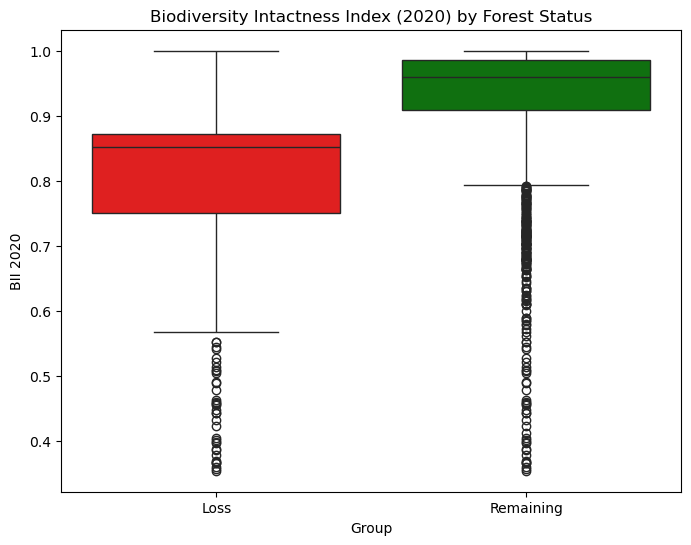

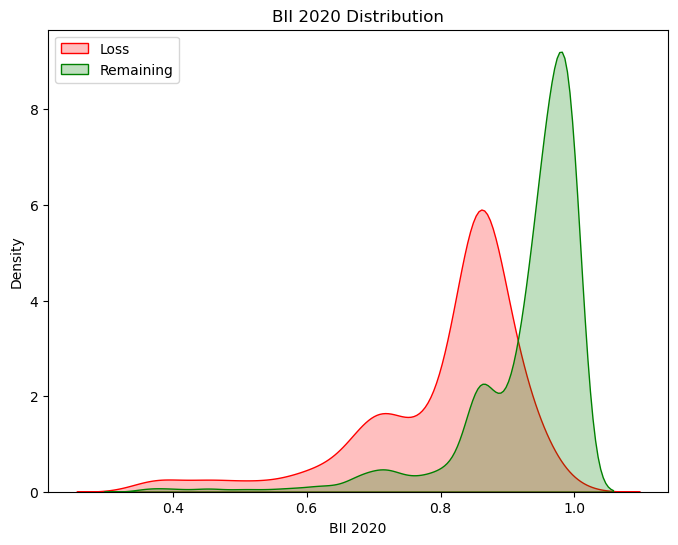

In [7]:
# Add a column to distinguish groups
loss_df['Group'] = 'Loss'
remain_df['Group'] = 'Remaining'

# Combine both datasets
combined_df = pd.concat([loss_df[['BII2020', 'Group']],
                         remain_df[['BII2020', 'Group']]])

# Plot boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x='Group', y='BII2020', data=combined_df, palette=['red', 'green'])
plt.title('Biodiversity Intactness Index (2020) by Forest Status')
plt.ylabel('BII 2020')
plt.show()

# Optional: plot histogram/density
plt.figure(figsize=(8,6))
sns.kdeplot(loss_df['BII2020'], label='Loss', color='red', fill=True)
sns.kdeplot(remain_df['BII2020'], label='Remaining', color='green', fill=True)
plt.title('BII 2020 Distribution')
plt.xlabel('BII 2020')
plt.ylabel('Density')
plt.legend()
plt.show()

**Boxplot Interpretation:**

Loss
- Median BII is lower (~0.85), meaning biodiversity intactness is generally lower in areas that experienced forest loss.
- The IQR is wider than Remaining, showing more variability in BII for lost forest pixels.
- Some very low BII values appear as outliers (below ~0.6).

Remaining (green box)
- Median BII is higher (~0.97), indicating remaining forest has higher biodiversity intactness.
- Narrower IQR, meaning most remaining forest pixels have consistently high BII.
- Few low-BII outliers exist, but most pixels are high.

In [6]:
from scipy.stats import mannwhitneyu

# Run Mann-Whitney U test
u_stat, p_value = mannwhitneyu(loss_df['BII2020'], 
                               remain_df['BII2020'], 
                               alternative='two-sided')  # use 'less' if you specifically expect loss < remain

print("Mann-Whitney U statistic:", u_stat)
print("p-value:", p_value)


Mann-Whitney U statistic: 281588.0
p-value: 2.469737642518151e-182


**Density Plot**

The red (Loss) distribution is skewed slightly left, indicating some lower BII values exist but most losses cluster around 0.8–0.85.
The green (Remaining) distribution is tightly clustered near 1.0, suggesting many regions have high intact BII values.
There is some overlap between the distributions between ~0.8–0.9, meaning some areas are partially degraded but not completely lost.

## Performing on 2 tops driver

In [104]:
# Top Drivers
url_d = "https://raw.githubusercontent.com/nooriza16/Forestloss/refs/heads/main/Ttest/Driver_BII.csv"
driver = pd.read_csv(url_d)

In [106]:
driver.head(3)

,system:index,BII2020,driver,.geo
0,1_1_1_1_2_0,0.862265,Permanent Agriculture,"{""type"":""Point"",""coordinates"":[115.28515820699..."
1,1_1_1_1_2_10,0.898678,Permanent Agriculture,"{""type"":""Point"",""coordinates"":[115.24403114775..."
2,1_1_1_1_2_40,0.908565,Permanent Agriculture,"{""type"":""Point"",""coordinates"":[112.25623198997..."


In [108]:
# Create separate dataframes for each driver
agriculture_df = driver[driver['driver'] == 'Permanent Agriculture'].copy()
hcommodities_df = driver[driver['driver'] == 'Hard commodities'].copy()
shiftingc_df = driver[driver['driver'] == 'Shifting cultivation'].copy()
logging_df = driver[driver['driver'] == 'Logging'].copy()
Wildfire_df = driver[driver['driver'] == 'Wildfire'].copy()

In [110]:
# Store DataFrames in a dictionary
driver_dfs = {
    'Permanent Agriculture': agriculture_df,
    'Hard commodities': hcommodities_df,
    'Shifting cultivation': shiftingc_df,
    'Logging': logging_df,
    'Wildfire': Wildfire_df
}

# Loop through each driver and print summary
for driver_name, df in driver_dfs.items():
    print(f"--- {driver_name} Summary ---")
    print(df.describe(include='all'))  # include='all' gives stats for numeric and non-numeric columns
    print("\n")


--- Permanent Agriculture Summary ---
       system:index     BII2020                 driver  \
count           448  448.000000                    448   
unique          448         NaN                      1   
top     1_1_1_1_2_0         NaN  Permanent Agriculture   
freq              1         NaN                    448   
mean            NaN    0.778625                    NaN   
std             NaN    0.134939                    NaN   
min             NaN    0.354636                    NaN   
25%             NaN    0.705414                    NaN   
50%             NaN    0.816895                    NaN   
75%             NaN    0.868491                    NaN   
max             NaN    0.975341                    NaN   

                                                     .geo  
count                                                 448  
unique                                                448  
top     {"type":"Point","coordinates":[115.28515820699...  
freq                     

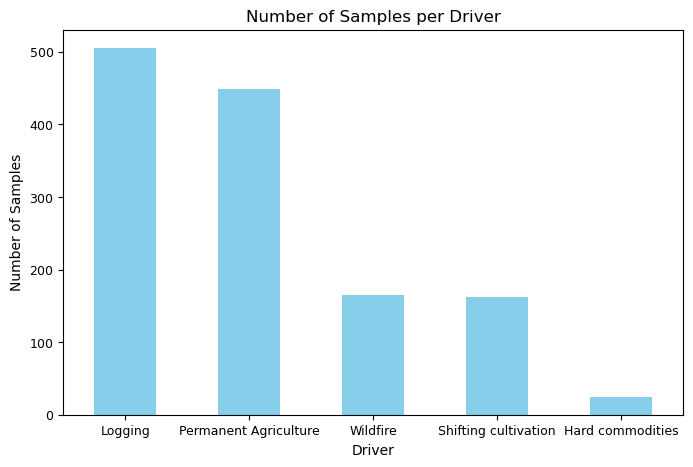

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count number of samples per driver
driver_counts = driver['driver'].value_counts()

# Matplotlib version
plt.figure(figsize=(8,5))
driver_counts.plot(kind='bar', color='skyblue', fontsize = 9)
plt.title('Number of Samples per Driver')
plt.xlabel('Driver')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.show()



C:\Users\nooriza maharani\AppData\Local\Temp\ipykernel_19844\4059443244.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='driver', y='BII2020', data=driver, palette=['red', 'green', 'skyblue', 'orange', 'purple'])


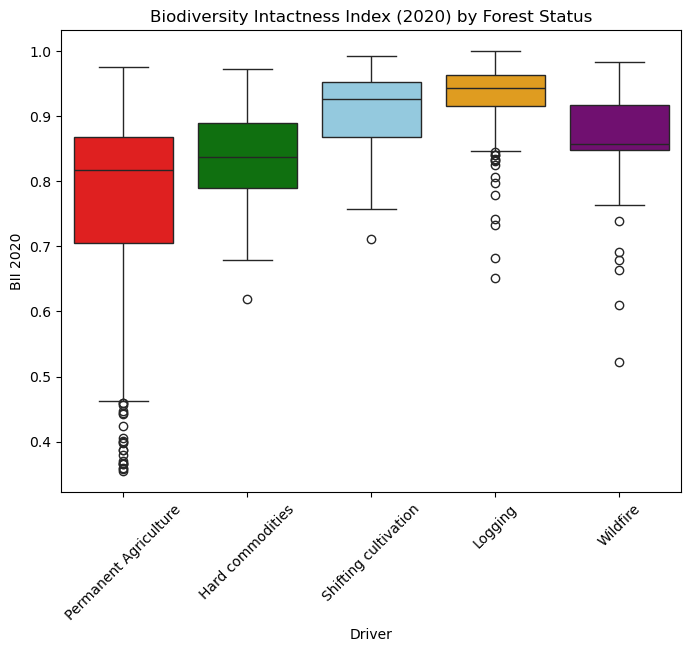

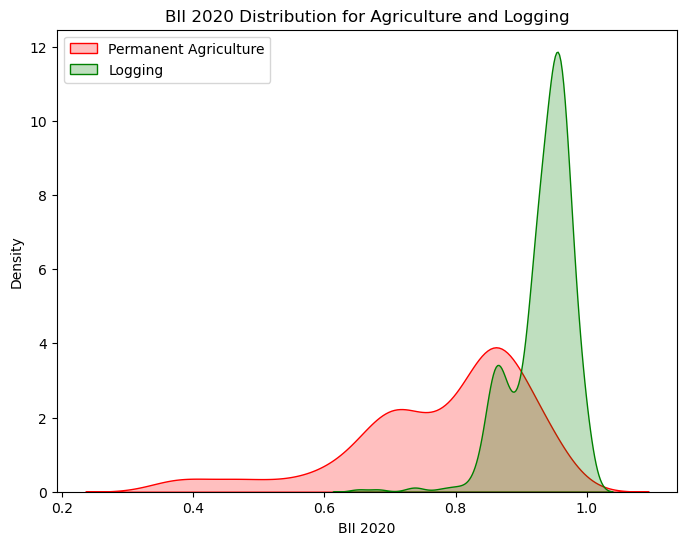

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot of BII2020 by driver (highlighting two drivers, you can adjust palette)
plt.figure(figsize=(8,6))
sns.boxplot(x='driver', y='BII2020', data=driver, palette=['red', 'green', 'skyblue', 'orange', 'purple'])
plt.title('Biodiversity Intactness Index (2020) by Forest Status')
plt.xlabel('Driver')
plt.ylabel('BII 2020')
plt.xticks(rotation=45)
plt.show()

# Optional: KDE plot for specific drivers
plt.figure(figsize=(8,6))
sns.kdeplot(agriculture_df['BII2020'], label='Permanent Agriculture', color='red', fill=True)
sns.kdeplot(logging_df['BII2020'], label='Logging', color='green', fill=True)
plt.title('BII 2020 Distribution for Agriculture and Logging')
plt.xlabel('BII 2020')
plt.ylabel('Density')
plt.legend()
plt.show()


C:\Users\nooriza maharani\AppData\Local\Temp\ipykernel_19844\739595343.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Driver")


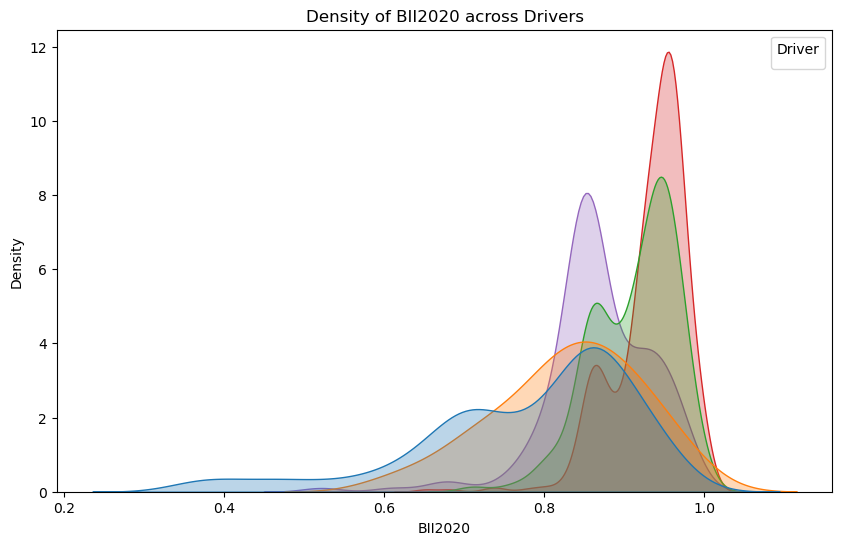

In [116]:
plt.figure(figsize=(10,6))

# Density plot of BII2020 for each driver
sns.kdeplot(data=driver, x="BII2020", hue="driver", common_norm=False, fill=True, alpha=0.3)

plt.title("Density of BII2020 across Drivers")
plt.xlabel("BII2020")
plt.ylabel("Density")
plt.legend(title="Driver")
plt.show()

In [118]:
drivers = driver['driver'].unique()

for d in drivers:
    df_sub = driver[driver['driver'] == d]
    mean_val = np.mean(df_sub['BII2020'])
    median_val = np.median(df_sub['BII2020'])
    print(f"{d}: mean = {mean_val:.3f}, median = {median_val:.3f}")


Permanent Agriculture: mean = 0.779, median = 0.817
Hard commodities: mean = 0.830, median = 0.837
Shifting cultivation: mean = 0.912, median = 0.926
Logging: mean = 0.933, median = 0.944
Wildfire: mean = 0.868, median = 0.858
